**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024

# Uranium Mill Network Dynamics Simulation Report
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Students:** Alyssa Puglisi, Cole Connerty, Gui LIma <br>
**Course:** Engy-4390 Nuclear Systems Design and Analysis  <br>
**Mentor:** Prof. Valmor F. de Almeida

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**16Oct2024**

[Project Repository on `GitHub`](https://github.com/dpploy/engy-4390/tree/main/projects/2024/u-mill)

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Objectives](#obj)
* [Tools](#tools)
* [Approach and Dynamics Equations](#app)
* [Challenges & Course Corrections](#correct)
* [Initialization of Process Modules](#IPM)
  + [Leaching](#leach)
  + [Decantation/Filtration](#clear)
  + [Solvent Extraction/Stripping](#solvent)
  + [Precipitation](#precip)
  + [Evaporation/Calcining](#evap)
* [Startup](#su)
* [Steady-State](#ss)
* [Disturbance](#malfunction)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>


Yellowcake is a material produced from uranium during the milling process. It is a mixture of different types of uranium oxide that combine to form a yellow tinted compound. This material is vital in the formation of reactor fuel in the later steps of the process known as uranium conversion. The two main processes used to recover uranium from the ground are In-Situ leaching and open-pit mining. In-Situ mining, which involves the injection of acid into the ground that dissolves uranium before being brought back to the surface in a pipe, is vastly more used in the US than open-pit because it allows a direct recovery of uranium without the need for digging out uranium bearing rock and moving it to a separate facility for processing. This does limit the places that the method can be used because the acid can contaminate groundwater if it is allowed to travel too deep. Once the uranium is pulled from the ground, it undergoes chemical separations to isolate the oxides.

The general unit operations that follow the mining of the ore are size reduction (crushing/grinding), then acid leaching. The acid leaching process uses acidic and alkaline aqueous solutions with agitation for four to 48 hours at ambient temperature. Usually sulfuric acid is used and results in a final liquor with a pH of 1.5. Manganese dioxide is typically then used with the liquor to result in [UO2(SO4)3]2- The resulting uranium-oxide containing ions must then be separated using either a solvent extraction or ion exchange. The ion exchange usually uses an ion-exchange resin along with any of a variety of processing equipment such as fixed or moving bed along with another chemical solution to “sorb” the complex ion from the leach solution. Solvent extraction involves using alkyl phosphoric acids and alkyl amides as solvents to remove the ions containing uranium from their leach solution. The uranium oxide must then be precipitated from the solutions created by the solvent extraction or ion exchange. The resulting “yellow cake” as it is commonly referred to is a mix of uranium oxides which is then shipped to a final purification facility.[4]

Yellow cake, which is about 90% U3O8, is then chemically processed into uranium tetrafluoride (UF4) through a process called hydrofluorination. This reaction mechanism consists of heating beds of solid uranium oxide in an environment of gaseous hydrofluoric acid and stripping away the oxide layers until only UF4 remains. HF is typically used in a 20% stoichiometric excess to maximize the conversion percentage of U3O8 to at least 98%. Before the uranium can be enriched however, the UF4 must be further converted into UF6, also known as uranium hexafluoride. This is because enrichment is largely dependent on gaseous centrifugal separation, and UF6 does not possess a liquid form under standard pressure conditions. Uranium fluorides are also the preferred form for enrichment because fluorine only exists in one natural isotope, meaning that the heavier molecules will always contain the Uranium-238.

Python code will be used to develop dynamic comprehensive systems that accurately represent the milling process as well as the complex parts of the plant that simulate a steady state reactor. This involves both mathematical models of the system’s material streams and visual representations of the data on a time dependent basis. Deliverable content will be prepared using Jupyter notebooks to seamlessly integrate working code with descriptive markdown text.  

There are environmental and non-proliferation applications that come from developing a dynamic model simulating the steps of the uranium fuel cycle. For instance, disturbances to the system can be modeled to determine the impact on the immediate processes involved as well as the cascading effects on the next steps of the cycle. This information can lead to engineers designing risk mitigating and preventative measures that can make the system safer for operation and for the environment. This application is useful for the everchanging frontier of finite resource management. A major example is the White Mesa uranium mill in Utah, which already has a system in place where they take in low level radioactive waste from companies and reprocess it using their heap leaching treatment methods. If natural sources of uranium become depleted over the years, it is vital to understand and develop alternative methods of fuel production from nuclear waste as well as other uranium remnant sources. 

The White Mesa Uranium Mill in Utah is the sole producer of uranium oxide in the United States, and operates using a heap based leaching approach. For the purposes of this model, we have selected White Mesa as the basis for the creation of modules. Upon examination of the flowsheet diagram created by White Mesa available in a 1993 IAEA report on the state of uranium milling, we have elected to model the following five unit operations in the milling process:leaching, clarification, solvent extraction, precipitation, and drying. These operations effectively encapsulate the majority of losses and operating costs in the uranium milling process, and capture both the very first and final stages of raw ore preparation in the production of uranium oxide.[3]


## [Objectives](#toc)<a id="obj"></a>

- Python code will be used to develop dynamic comprehensive systems that accurately represent the milling process as well as the complex parts of the plant that simulate a steady state reactor. This involves both mathematical models of the system’s material streams and visual representations of the data on a time dependent basis. 
- Modules to model the leaching, filtration, solvent extraction, precipitation, evaporation, and calcination steps will be developed.
- Deliverable content will be prepared using Jupyter notebooks to seamlessly integrate working code with descriptive markdown text.  
- A flowsheet based on White Mesa will be developed as the basis for our modules



## [Tools](#toc)<a id="tools"></a>

For this project we will be utilizing GitHub to store a remote repository of our python code and project report. GitHub is a version control software that programmers use to share and work on coding projects together. This allows for users to view the contribution history easily and rollback changes if needed. GitHub interfaces with git to create a graphical user interface for the git repository. This allows GitHub to add some of its own tools on top of git making it much more powerful. One of these tools is the Network Graph that allows users to see all branches of the repository and all commits along with dates that changes were made. Another tool is viewing the version history of a specific file by opening it on the GitHub repository. This shows all changes made to that file including commit numbers, dates of changes, and more. This makes it much easier to go back in time to see the history of the project and see who made which changes. At its core, a GitHub repository is a mirror of a git repository with any changes being submitted through GitHub automatically being sent to the git repository as well.

To work on a git repository, you first must clone the repository to your computer using the git clone command. This creates a clone of the remote repository on your computer which is then called the local repository. It will also create a copy of this local repository called the working directory. All edits made by the user are found in the working directory and do not impact the local repository until a commit is made. Next, the user will create their own branch using the git branch command. This branch is a copy of the repository that the user will use to make changes without impacting the main branch. This makes it easier for the repository maintainer to control the changes made to the project since they can view differences between the main branch and one of the user branches. This helps to prevent branch conflicts from creating bugs or other errors on the main branch of the repository. When a user is satisfied with a contribution, they will create a commit using the git commit command. The user will write a brief one-line description of what has been changed followed by a longer description with much more detail. A comparison is then made between the working directory and the local repository to see which changes have been made. Any changes in the working directory will be compiled into the commit and saved for later. Commits serve as documentation for changes and are vital to using git. The short description allows for the repository maintainer to easily see what changes are being made to the project, but still allows for technical details to be documented in the long description.

When a user wants to publish their commits to the remote repository for other users to see there is a specific procedure that must be followed. This is to prevent any conflicts from arising in the final step where the local repository is merged with the remote repository by the repository maintainer. First, the user must update their copy of the local repository to obtain the latest version of the project. Updating the local repository is done by using the git fetch command followed by the git merge command. This can also be done using the git pull command which executes both commands sequentially. The git fetch command compares the local repository to the target showing the differences between the two. This also downloads any missing commits to the local repository so they can be reviewed by the user. The git merge command combines the remote repository with the local repository. This process effectively creates a copy of the remote repository on the user's computer, but also includes any saved commits to ensure that the local repository is up to date. Following this process, the git push command can be used to push the unuploaded commits onto the remote repository. Since a separate branch was created earlier, this branch must be merged into the main branch so other users can merge these changes into their branch. This can be done by running git merge on the main branch to merge the main branch into the user's branch. Now the local repository is updated with the changes of all other users with the remaining commits that are trying to be published to the remote repository. Finally, the user can make a request to the repository maintainer to run git pull on their local repository. This is known as a pull request since you are requesting the repository maintainer to run the git pull command.

GitHub helps to make the pull request process easier by integrating it into their platform. All active pull requests can be viewed on the repository website with a discussion section where users can discuss any problems they find with the changes. In addition to this, GitHub streamlines the process through the use of the GitHub desktop app. Instead of running each of the git commands through the command line sequentially, they can be executed in a graphical user interface via GitHub desktop. After downloading GitHub desktop, the user is prompted to clone a repository and login to their GitHub account. This creates a local repository and working directory for the user with commits and pull requests being linked to their GitHub account. After creating changes to files in the working directory, GitHub desktop will show the user the current differences between the working directory and the local repository. A commit window is displayed with boxes for the short description and long description right next to these differences making the commit process much easier. In order to publish changes to the remote repository there are recommended prompts that aid the user through the pull, push, and pull request process. If the user would like to run any of the other git commands, these can be accessed at the top by clicking on Repository and selecting the desired command to run.

Cortix is a library for Python that was created by Dr. Almeida and his research group to simplify the process of producing dynamic system models. The full open-source code can be found on Github, where anyone can download and use the library and its available unit operation modules. The Github repository also contains examples that use the code to simulate various chemical interactions while delivering time dependent data. 

Jupyter Notebook is also open-source, and it is a way to integrate ordinary text with multiple programming languages such as Python. Python is a widely used programming language that has engineering modeling applications. This is a popular language for dynamic modelling and has been in use for over thirty years. It is commonplace in many programs used in the nuclear industry, making it a great candidate for this project. 

## [Approach and Dynamics Equations](#toc)<a id="app"></a>

-  First, a series of mass balances and component balances are made based on the desired input of 1 ton of raw material.
- These balances then take into account the chemical kinetics and related rates required in the operation of White Mesa's chemical reactions and fluid flow operations
- Once baseline models of each individual process exist, they are then programmed into 5 separate but connected modules within Cortix
- Each process will be capable of interacting with the modules connected to it on either end, allowing them to share data such as the incoming and outgoing streams from one process to the next

|     **Module**        |      **Inputs**      |      **Outputs**       |     **Legend**     |
|:----------------------|:---------------------|:-----------------------|:-------------------|
| Leaching             |        |           |        |
| Filtration             |m<sub>al</sub>, ρ<sub>al</sub>, C<sub>al</sub>, m<sub>al</sub>, ρ<sub>pl</sub>, C<sub>pl</sub>, m<sub>r</sub>, ρ<sub>r</sub>, C<sub>r</sub>, m<sub>w</sub>        |m<sub>f</sub>, ρ<sub>f</sub>, C<sub>f</sub>,, m<sub>sl</sub>, ρ<sub>sl</sub>, C<sub>sl</sub>, m<sub>std</sub>, ρ<sub>std</sub>, C<sub>std</sub>, m<sub>ccd</sub>, ρ<sub>ccd</sub>, C<sub>ccd</sub>         |m<sub>al</sub> = mass flowrate of acid leach, ρ<sub>al</sub> = mass density of acid leach, m<sub>pl</sub> = mass flowrate of pre leach, ρ<sub>pl</sub> = mass density of pre leach, C<sub>al</sub> = ppm of solids in acid leach, C<sub>pl</sub> = ppm of solids in pre leach, m<sub>w</sub> = mass flowrate of wash water,m<sub>r</sub> = mass flowrate of raffinate, ρ<sub>r</sub> = mass density of raffinate, C<sub>r</sub> = ppm of solids in raffinate, m<sub>sl</sub> = mass flowrate of slurry waste, ρ<sub>sl</sub> = mass density of slurry waste, C<sub>sl</sub> = ppm of solids in slurry waste, m<sub>std</sub> = mass flowrate of single tank decantation, ρ<sub>std</sub> = mass density of single tank decantation, C<sub>std</sub> = ppm of solids in single tank decantation, m<sub>sl</sub> = mass flowrate of slurry, ρ<sub>sl</sub> = mass density of slurry, C<sub>sl</sub> = ppm of solids in slurry, m<sub>ccd</sub> = mass flowrate of counter current decantation, ρ<sub>ccd</sub> = mass density of counter current decantation, C<sub>ccd</sub> = ppm of solids in counter current decantation   |
| Solvent Extraction             |m<sub>aef</sub>, m<sub>oef</sub>, m<sub>voii</sub>, m<sub>oii</sub>, m<sub>vaii</sub>, m<sub>aii</sub>        | m<sub>ap</sub>, m<sub>op</sub>, m<sub>voio</sub>, m<sub>oio</sub>, m<sub>vaio</sub>, m<sub>aio</sub>            |m<sub>aef</sub> = mass flow rate of aqueous external feed, m<sub>oef</sub> = mass flow rate of organic external feed, m<sub>voii</sub> = mass flow rate of vapor organic inter-stage inflow, m<sub>oii</sub> = mass flow rate of organic inter-stage inflow, m<sub>vaii</sub> = mass flow rate of vapor aqueous inter-stage inflow, m<sub>aii</sub> = mass flow rate of aqueous inter-stage inflow, m<sub>ap</sub> = mass flow rate of aqeuous product,m<sub>op</sub> = mass flow rate of organic product, m<sub>voio</sub> = mass flow rate of vapor organic inter-stage outflow, m<sub>oio</sub> = mass flow rate of organic inter-stage outflow, m<sub>vaio</sub> = mass flow rate of vapor aqueous inter-stage outflow, m<sub>aio</sub> = mass flow rate of aqueous inter-stage outflow           |             |        |           |        |
| Precipitation             |        |           |        |
| Evaporation            |m<sub>evap</sub>, ρ<sub>evap</sub>, T<sub>evap</sub>, T<sub>cal</sub>, V<sub>evap</sub>, V<sub>cal</sub>       |  m<sub>p</sub>, ρ<sub>p</sub>, C<sub>p</sub>         |m<sub>f</sub> = mass flowrate of evaporation product, ρ<sub>evap</sub> = mass density of evaporation product, T<sub>evap</sub> = temperature setpoint (evaporator), V<sub>evap</sub> = evaporator tank liquid volume, V<sub>cal</sub> = calciner tank volume, m<sub>p</sub> = calciner product mass flowrate, ρ<sub>p</sub> = calciner product mass density,C<sub>p</sub> = product U3O8 concentration        |

## [Challenges & Course Correctons](#toc)<a id="correct"></a>

When this project was initially proposed, we were expecting to model an In-Situ style uranium mill. This is due to the advantage of causing less ground disturbance for deeper reservoirs than with a traditional open pit mine, as well as the ability to be a one site process due to the removal of the ore crushing and transportation steps of the process. Even though this process shows promising signs, there is not much publicly available information on the operations of an In-Situ mine. This is most likely due to it being a newer method of uranium recovery with proprietary knowledge not yet being shared. As a result, this presented a challenge of finding a better option that still has realistic and useful applications. This was what led us to the option of modelling White Mesa’s heap leaching method. 

Some of the advantages of modelling the White Mesa mill have already been mentioned. Being the only active uranium mill in the US makes it the only sensible option for a national based model. Groups interested in preserving and expanding our knowledge of the processes involved in the nuclear fuel cycle such as the Uranium Science and Technology Center in Oak Ridge, Tennessee will be receiving their domestic milled uranium from White Mesa. By using this mill as an example, the exact chemical interactions and properties involved will be consistent with the physical product being used throughout all future lab scale operations conducted in the US. 

## [Initialization of Process Modules](#toc)<a id="IPM"></a>

### [Leaching](#toc)<a id="leach"></a>
The leaching step consists of treating the uranium ore with an alkaline or acid reagent to dissolve it. The uranium is dissolved in the solution through a reaction described by [UO<sub>3</sub> + 2H<sup>+</sup> --> UO<sub>2</sub><sup>2+</sup> + H<sub>2</sub>O]. In an acidic leaching solution the uranyl ion then combines with the sulphate ion, [UO<sub>2</sub><sup>2+</sup> + 3(SO<sub>4</sub>)<sup>2-</sup> --> UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub><sup>4-</sup>] to form a stable complex. In an alkaline leaching solution the chemical reaction is [UO<sub>2</sub><sup>2+</sup> + 3(CO<sub>3</sub>)<sup>2-</sup> --> UO<sub>2</sub>(CO<sub>3</sub>)<sub>3</sub><sup>4-</sup>]. Acidic leaching is preferred over alkaline leaching where the ore contains less than 10% carbonates, typically sulfuric acid is used for acidic leaching and sodium carbonate or sodium bicarbonate is used for alkaline leaching. The oxidation reaction in acidic solutions is usually achieved by the ferric ion Fe<sup>3+</sup> acting as an electron transfer agent in the solution. In order to sustain this oxidation, pyrolosite, sodium chlorate, or Caro's acid can be used to regenerate the Fe<sup>3+</sup>. Alkaline leaching cannot sustain a high enough ferric ion concentration so higher pressure, temperature, leaching times, and a finer ore grind are needed. 

```python
Leaching process in the White Mesa Milling Plant.

                    Wet Ore
                   (internal)
                       |
                       |
                       |
                       v
 Pre-Leach     |----------------|
 Product       |                |
         <-----|  Pre-leaching  |<-------- Pre-Leach Feed (CCD overflow from Decantation Module)
 (to ST        |                |
  Decant.)     |----------------|
               |                |<-------- Acid-Leach Feed (STD underflow from Decantation Module)
               |  Acid-leaching |
               |                |<-------- Acids (internal source) H2S04, NaCI03, Steam)
               |________________|
                        |
                        |
                        |
                        v
        Acid-leach Product (to CCD Decantation)   
```

In [1]:
'''Setup a White Mesa plant'''
from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True) # System top level
white_mesa_net = white_mesa.network = Network() # Network

[15616] 2024-09-30 17:48:48,024 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

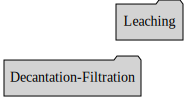

In [12]:
'''Setup Leaching stand-alone'''
import src.leaching # this will give access to the python module docstring
leaching = src.leaching.Leaching()
white_mesa_net.module(leaching) 
white_mesa_net.draw(engine='circo', node_shape='folder', ports=True)

Documentation options:
 + Live notebook run on *code* cell: `help(src.leaching)`
 + On the web: [source](https://github.com/dpploy/engy-4390/blob/main/projects/u-mill/white_mesa/leaching.py)

In [13]:
'''Run White Mesa and shutdown'''
leaching.end_time = 2*unit.day
leaching.show_time = (False,0)
white_mesa.run()
white_mesa.close()

[15616] 2024-09-30 17:52:41,969 - cortix - INFO - Launching Module <src.decantation_filtration.DecantationFiltration object at 0x0000023FEC9EFF50>
[15616] 2024-09-30 17:52:44,720 - cortix - INFO - Launching Module <src.leaching.Leaching object at 0x0000023FEDB67750>
[15616] 2024-09-30 17:52:51,976 - cortix - WARNING - Network::run(): not all modules reloaded from disk.                              # modules = 2; # files = 1
[15616] 2024-09-30 17:52:51,977 - cortix - INFO - run()::Elapsed wall clock time [s]: 233.84
[15616] 2024-09-30 17:52:51,978 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      

In [14]:
'''Recover Leaching and plot'''
leaching = white_mesa_net.modules[0]
leaching.preleach_phase.plot(['liquid-volume','mass-flowrate','mass-density'],show=True,figsize=[14,8])

AttributeError: 'DecantationFiltration' object has no attribute 'preleach_phase'

### [Decantation/Filtration](#toc)<a id="clear"></a>


```python
                       |-----------------|
                       |                 |
                       |   DECANTATION   |
     STD underflow     |                 |
           <-----------|                 |<-------- Wash water (internal source)
     (to Leaching)     |                 |<-------- Feed (from Leaching Module pre-leach product)
                       |  + Single Tank  |
     STD overflow      |                 |
           <-----------|                 |
    (to Filtration)    |                 |
                       |.................|
     CCD overflow      |                 |<-------- Feed (from Leaching Module acid-leach product)
           <-----------|                 |<-------- Wash water (internal source)
     (to Leaching)     |                 |<-------- Raffinate Feed (from Solvent Extraction)
                       |  + CC Bank Tank |
     CCD underflow     |                 |
           <-----------|                 |
     (to tailings)     |                 |
                       |-----------------|
                       |                 |
                       |   FILTRATION    |<-------- STD Overflow (internal from STD overflow)
                       |                 |
                       |-----------------|
                            |       |
                            |       |
                            |       |
                            v       v
                         Filtrate  Slurry Waste (TBD)
```

The filtration module consists of two main parts; the decantation flows and the filtration flows. Since the initial output from the leaching process contains particles that are too large to effectively remove via filtration, White Mesa first uses a step called counter-current decantation to act as a coarser filter for solids.[3] 


__Single Tank & Counter Current Decantation__
 

The counter current decantation and single tank processes takes advantage of the process of settling to separate solid impurities from an aqueous fluid stream by diluting it with water. As the liquid stream passes through a stage, known also as a ‘thickener’, the solids begin to descend to the underflow portion of the stage. Ideally, a minimal number of solid impurities remain in the clarified stream as it passes through the overflow stream on the top of the apparatus. 

Cn=C1−Cw/(1+WR+WR^2+…+WR^n)
 Equation D.1 

As seen in equation D.1, the calculation for the concentration depends on; n - the number of stages used, WR – the wash ratio per stage, Cn – the concentration at stage n (ppm), C1 – the initial concentration (ppm), and Cw – the concentration in the wash water (ppm).[6] Therefore, the equation in the code for the module can allow for a manual change of the number of stages used in order to change the quality of the produced product for experimental purposes. By default, the set number of stages will be based on the typical quality produced at White Mesa. 




<nop/> <div style="width: 500px;">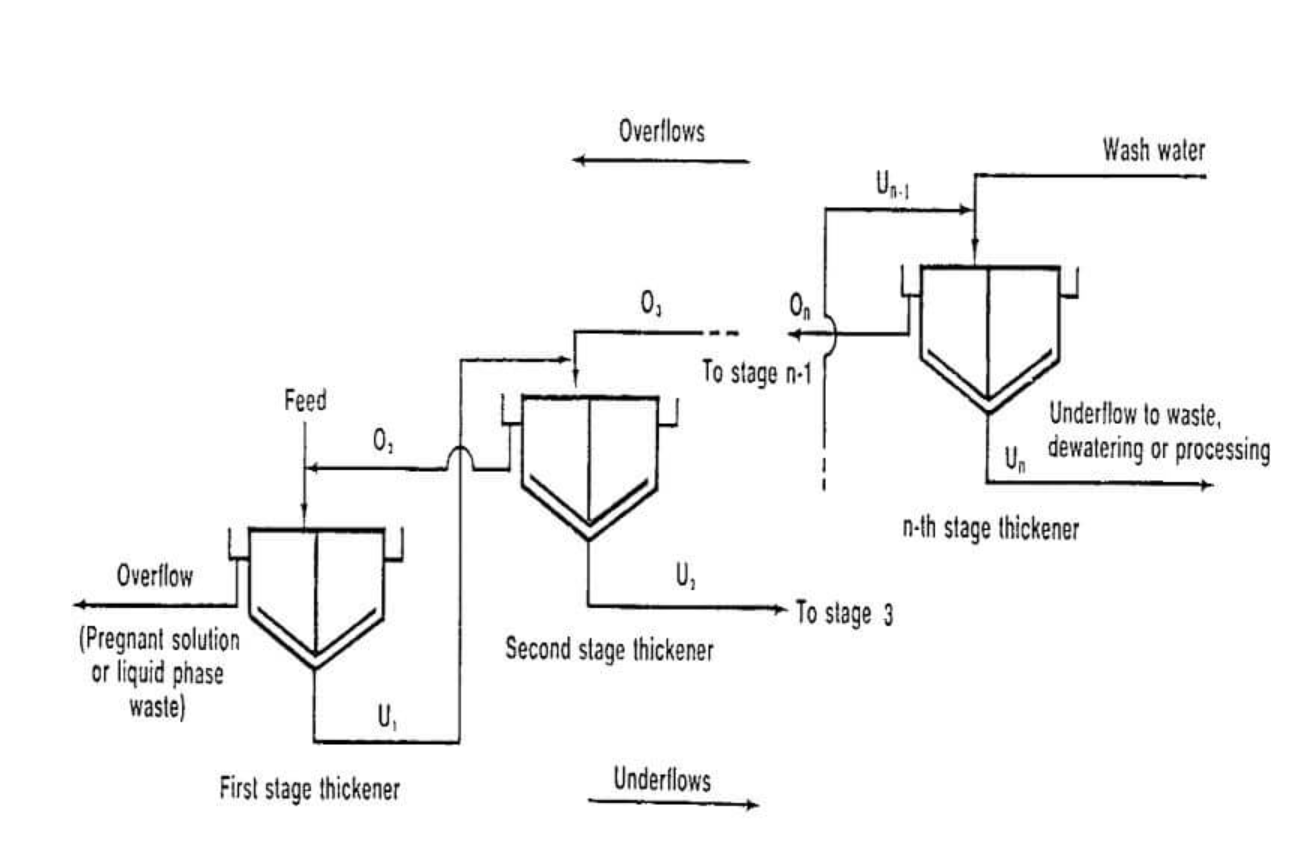</div>
 

Figure D.1 - Continuous Countercurrent Decantation Loop with Wash water Streams 

As the name implies, the wash water is run counter currently to the feed to ensure the maximum stream quality at the bottom stage when it overflows. This can be seen in Figure D.1 with the added possibility to add ascending stages to reach a better final concentration. In order to make this a time dependent process, the wash ratio per stage (or the change in concentration per stage) is found using Navier-Stoke's law for the settling velocity of solids. 

 
V = (g(ρ1/ρ - 1)d^2)/18υ  Equation D.2

Where V = settling velocity of the solid, g = acceleration due to gravity, ρ1 = mass density of the solid, ρ = density of the fluid, d = the diameter of the solid, and υ = kinematic viscosity of the fluid. This settling velocity multiplied by the cross-sectional area of the thickener gives the volumetric flow rate of sediment loss, and by extension the change in concentration of the feed stream. There are two separete decanter processes that need to be modeled. The first is a single tank that takes in feed from pre-leaching, sending its underflow to acid leaching for further processing and the overflow into a vacuum drum filter to reduce the ppm of solids to 10. The second decanter process takes in the reprocessed feed from acid leaching and sends the overflow back to pre-leaching with a smaller concentration of solids. The underflow from this process can be discarded as tailings.

__Filtration__ 

Uranium filtration is the separation of solids from a slurry stream that allows liquid through pores. This step of the nuclear fuel cycle comes after the initial leaching and rough decantation of the raw ore and prepares the product stream by further purifying it before it is sent to a solvent extraction device. If the presence of impurities reaches 200ppm it can lead to column plugging which can halt the solvent extraction process entirely, so the accepted practice is to keep the value at 10ppm or less. The unit operation involved is a rotary filter with a porous membrane rotating in and out of the slurry mixture that continuously purifies the feed. The filtration rate of the bulk system is controlled via the use of induced vacuum through the drum or added pressure to the stream.[3] 

The open pit and heap leaching processes disturb a large piece of the environment relative to what is extracted for fuel. As a result, most of the removed impurities are recovered as tailings. There are environmental requirements for the quality of tailings such as the maximum allowable ppm of harmful acids, therefore the contents of the tailings can be modelled both to account for the overall mass balance and the environmental requirements for safe operation. 

A pressure based constant rate filtration model has the form: 

dV/dt = (ΔPA^2)/(μ(αCV + RmA)
 Equation F.1 

Where ΔP is the pressure drop over the cake and filter (Pa), μ is filtrate viscosity (Pa.s), α is the average specific resistance (m/kg), A is the filter area, q is the filtrate flow rate (m^3/s), V is filtrate volume (m^3), C is the average dry cake mass per unit volume of filtrate (kg/m^3), and Rm is the filter’s medium resistance (m^-1). Since there is a limit to the operating pressure in the system, the maximum pressure difference is the upper bound limit. The increase in resistance to filtration due to the buildup of cake is pressure dependent, as explained in Darcy’s law of cake filtration. However, the module will make an ideal assumption of constant resistance due to the persistant cleaning of the filter cake. Rotary drum filtration is the best option due to its increased permeation rate that increases as a result of the tangential style of contact with the liquid stream.

The total time of a cycle through the drum is typically 3-6x the cake formation time. Typical inputs from the leaching process include soluble uranyl carbonate complex ion [UO2(CO3)3]4- dissolved in (typically) sulfuric acid. Impurities in the liquor are metals, such as vanadium, molybdenum, thorium, aluminum, gold, copper, and iron as well as sulfate ions. The Equation F.1 can be integrated to solve for the flowrate of clean feed liquid. This equation represents the rate of production, or the effective output of solvent-extraction ready aqueous solution containing the uranyl sulfate from leaching. It can also be used to find the amount of residue removed in the cake, which should amount to 90% of the post-CCD concentration of impurities. The module will contain the input and output streams that connect it to leaching and solvent extraction respectively, but a separate waste stream will also be produced with its own level of purity to ensure full accountability for all uranium-based materials. 

__Sizing & Cost__

Using the sizing data from the 1993 IAEA report on White Mesa, we are able to quantify the cost of each of the three main unit operations involved with Decantation/Filtration. This figure can be adjusted for a plant built on a pilot scale using the 6 tenths exponent rule, wherein the cost of a unit can be increased or decreased by using the size ratio raised to the 0.6 power. This is a common cost estimation tool used when preparing to build a chemical process.

For the single tank thickener, the size is 38 m in diameter and 10 m in height for a volume of 3400 m^3. A tank of this size costs approximately 33,300 USD. A comparable pilot scale tank 1 tenth the size would therefore cost 8,400 USD. The multi-tank counter current decantation consists of 7 equally sized tanks, each of 12 m diameter and 3 m tall. This results in a cost of 60,000 USD total, or 8,600 USD per tank. A pilot scale operation would cost 15,000 USD, or 2,100 USD per tank. The third and final stage of this process is filtration in the rotary drum. The tank is considerably smaller due to the trickle-down effect of the single tank that feeds it, with a diameter of 3 m and a height of 1.1 m for a total volume of 32 m^3. The cost of a rotary drum is 11,600 USD, or 2,900 USD on a pilot scale.

In total, a full sized Decantation/Filtration operation would cost 104,900 USD, and a pilot plant would cost 26,400 USD. Pricing estimates are sourced from a wholesale process seller, Alibaba. [6]

__Constructing the Module__

The contents consisting of time dependent equations, state properties, and phase histories are kept in a 'decantation_filtration.py' file. This handles all of the calculations required to update the values of solid ppm, mass flow rate, and mass density of each of the input and output streams for each time step. There is a separate 'run' file that is capable of starting up and terminating the simulation over a set period of time called 'run_decantation_filtration.py'. This 'run' file is also capable of generating graphs to visually represent the change of data over time. A single run file called 'run_plant' is capable of running all of the module run files simultaneously. The mathematical models from the previous section provide the steady state values that are converged to after the startup period, and formed the basis for the dynamic mass and component balances.

For the single tank decantation, there are dynamic equations for the concentration of solids in the streams being sent to acid-leaching and filtration.

C<sub>ov</sub>(t) = 100 + (C<sub>pl</sub> - 100)e<sup>-t/τ</sup>          Eqn F.2

C<sub>al</sub>(t) = 9900 + (C<sub>pl</sub> - 9900)e<sup>-t/τ</sup>          Eqn F.3

Where C<sub>ov</sub> = concentration of solids in the overflow of the single tank that is sent to filtration, C<sub>pl</sub> = concentration of solids in the preleach feed to the tank, t = time, τ = time taken to fill the tank at the current flowrate, and C<sub>al</sub>(t) = concentration of solids being sent to acid leaching in the underflow. 

Equations F.2 and F.3 represent the concentration of solids in the single tank's underflow and overflow as a function of time respectively, with a flow residence time term that takes into account the initial variations in feed concentration. The tank is designed to maintain a near-constant performance once the tank is filled, making the τ exponential term become less influencial over time.

There are also two dynamic equations for the mass flowrate in the streams being sent to acid-leaching and filtration based on the component balance for solids. 

m<sub>ov</sub> = 1/(C<sub>al</sub>/C<sub>f</sub> + 1)*m<sub>pl</sub>  Eqn F.4
    
m<sub>al</sub> = (C<sub>al</sub>/C<sub>f</sub>)/ (C<sub>al</sub>/C<sub>f</sub> + 1)*m<sub>pl</sub>  Eqn F.5

Where m<sub>ov</sub> = mass flowrate of overflow to filration, m<sub>pl</sub> = mass flowrate of the feed from pre-leaching, and m<sub>al</sub> = flow rate of underflow to acid leaching. These equations maintain the ratio of overflow to underflow at 1:99, showing that there is relatively little aqueous solution being sent immediately to filtration.

For the 7 counter current tank decantation, there are dynamic equations for the concentration of solids in the streams being sent to pre-leaching and tailings.

C<sub>ccd</sub>(t) = 99 + (C<sub>feed</sub> - 99)e<sup>-t/τ</sup>          Eqn F.6

C<sub>T</sub>(t) = 9801 + (C<sub>feed</sub> - 9801)e<sup>-t/τ</sup>          Eqn F.7

Where C<sub>ccd</sub> = concentration of solids in the overflow of the CCD system that is sent to pre-leaching, C<sub>T</sub> = concentration of solids in the tailings, t = time, τ = time taken to fill the 7 tanks at the current flowrate, and C<sub>feed</sub>(t) = concentration of solids being fed to the CCD system.

Equations F.6 and F.7 represent the concentration of solids in the CCD underflow and overflow as a function of time respectively, with a flow residence time term that takes into account the initial variations in feed concentration. The tanks are designed to maintain a near-constant performance once filled, making the τ exponential term become less influencial over time.

There are also two dynamic equations for the mass flowrate in the streams being sent to pre-leaching and tailings based on the component balance for solids. 

m<sub>ccd</sub> = 1/(C<sub>ccd</sub>/C<sub>T</sub> + 1)*m<sub>feed</sub>  Eqn F.8
    
m<sub>T</sub> = (C<sub>ccd</sub>/C<sub>T</sub>)/ (C<sub>ccd</sub>/C<sub>T</sub> + 1)*m<sub>feed</sub>  Eqn F.9

Where m<sub>ccd</sub> = mass flowrate of overflow to pre-leaching, m<sub>feed</sub> = the mass flowrate of the feed coming from acid-leaching, and m<sub>T</sub> = flow rate of underflow to tailings.

For filtration, the solid mass fractions of the filtrate and the slurry streams must remain constant at 10 ppm and ~1.0 respectively. This is because the filtrate phase must be maintained at 10 ppm to be approved for use in the solvent extraction apparatus. The mass flowrate models can be seen in the following equations:

m<sub>filtrate</sub> = 0.991* m<sub>ov</sub>   Eqn F.10

m<sub>sl</sub> = 0.009* m<sub>ov</sub>  Eqn F.11

Where m<sub>filtrate</sub> = mass flowrate of filtrate and m<sub>sl</sub> = mass flowrate of the slurry waste. These values are on a 99:1 split because the aqueous stream is being almost entirely sent through to solvent extraction with the exception of a small portion of solids that are being sent in with the feed from the single tank decantation's overflow.

In [5]:
'''Setup a White Mesa plant'''
from cortix import Cortix
from cortix import Network
from cortix import Units as unit
white_mesa = Cortix(use_mpi=False, splash=True) # System top level
white_mesa_net = white_mesa.network = Network() # Network

[15616] 2024-09-30 17:48:58,133 - cortix - INFO - Created Cortix object 
_____________________________________________________________________________
                             L A U N C H I N G                               
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R I888>   4888> "      8888      888E      8888
88888 `> `8888>     888R I888>   4888>        8888      888E      `888N
`8888L %  ?888   ! u8888cJ888   .d888L .+    .8888Lu=   888E   .u./"888&
 `8888  `-*""   /   "*888*P"    ^"8888*"     ^%

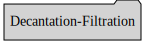

In [6]:
'''Setup Decantation-Filtration stand-alone'''
import src.decantation_filtration # this will give access to the python module docstring
decant_filt = src.decantation_filtration.DecantationFiltration()
white_mesa_net.module(decant_filt) 
white_mesa_net.draw(engine='circo', node_shape='folder', ports=True)

Documentation options:
 + Live notebook run on *code* cell: `help(src.decantation_filtration)`
 + On the web: [source](https://github.com/dpploy/engy-4390/blob/main/projects/u-mill/white_mesa/decantation_filtration.py)

In [7]:
'''Run White Mesa and shutdown'''
decant_filt.end_time = 8*unit.day
decant_filt.show_time = (False,0)
white_mesa.run()
white_mesa.close()

[15616] 2024-09-30 17:48:58,431 - cortix - INFO - Launching Module <src.decantation_filtration.DecantationFiltration object at 0x0000023FEC882390>
[15616] 2024-09-30 17:49:42,092 - cortix - INFO - run()::Elapsed wall clock time [s]: 43.96
[15616] 2024-09-30 17:49:42,093 - cortix - INFO - Closed Cortix object.
_____________________________________________________________________________
                           T E R M I N A T I N G                             
_____________________________________________________________________________
      ...                                        s       .     (TAAG Fraktur)
   xH88"`~ .x8X                                 :8      @88>
 :8888   .f"8888Hf        u.      .u    .      .88      %8P      uL   ..
:8888>  X8L  ^""`   ...ue888b   .d88B :@8c    :888ooo    .     .@88b  @88R
X8888  X888h        888R Y888r ="8888f8888r -*8888888  .@88u  ""Y888k/"*P
88888  !88888.      888R I888>   4888>"88"    8888    888E`    Y888L
88888   %88888      888R 

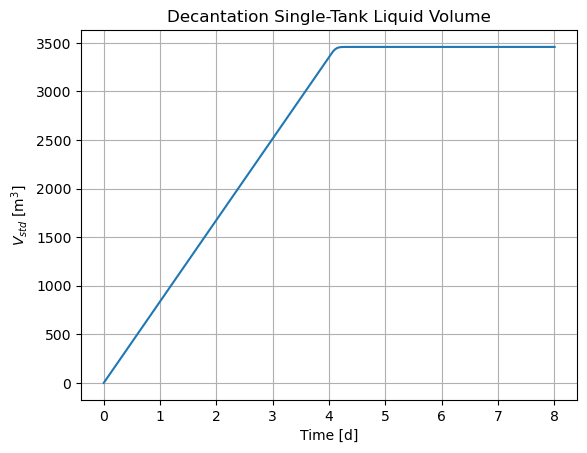

In [8]:
'''Recover Decantation/Filtration and plot'''
import matplotlib.pyplot as plt
decant_filt = white_mesa_net.modules[0]
(quant, time_unit) = decant_filt.std_state_phase.get_quantity_history('liquid-volume')
quant.plot(x_scaling=1/unit.day, x_label='Time [d]',y_label=quant.latex_name+' ['+quant.unit+']')
plt.grid()

Shown above is the filling up of the single tank thickener with a volume of 3400 m^3. The initial fill rate is relatively linear due to the lack of outflows during the startup period. A valve at the bottom of the tank prevents underflow from leaving the tank until the overflow begins. Once the tank is full, the volume of the tank reaches steady state slightly above 3400 m^3 due to the height added from the overflow of the tank.

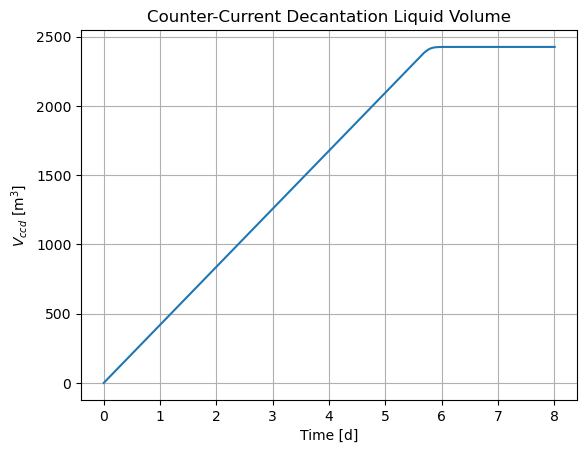

In [9]:
(quant, time_unit) = decant_filt.ccd_state_phase.get_quantity_history('liquid-volume')
quant.plot(x_scaling=1/unit.day, x_label='Time [d]',y_label=quant.latex_name+' ['+quant.unit+']')
plt.grid()

Shown above is the filling up of the 7 tank counter current decantation. The combined volume of the 340 m^3 tanks results in a 2380 m^3 total volume. The steady state volume is closer to 2380 m^3 due to the smaller overflow coming off of each tank.

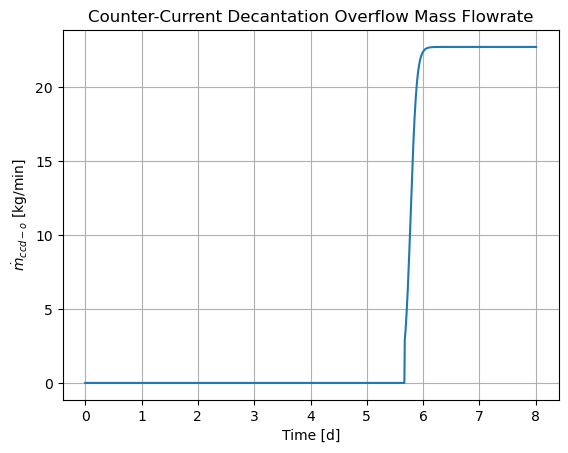

In [10]:
import matplotlib.pyplot as plt
decant_filt = white_mesa_net.modules[0]
(quant, time_unit) = decant_filt.ccd_overflow_phase.get_quantity_history('mass-flowrate')
quant.plot(x_scaling=1/unit.day, y_scaling=unit.minute, x_label='Time [d]', y_label=quant.latex_name + ' [kg/min]')
plt.grid()

The mass flowrate of the counter current decantation overflow shows that it takes 5.8 days to fill up the tanks and 13 hours to reach steady state once all tanks are filled. The steady state value is at a ratio of 1:99 with the underflow mass flowrate, as the majority of the feed is being removed as solid tailings. The other chart can be seen directly below.

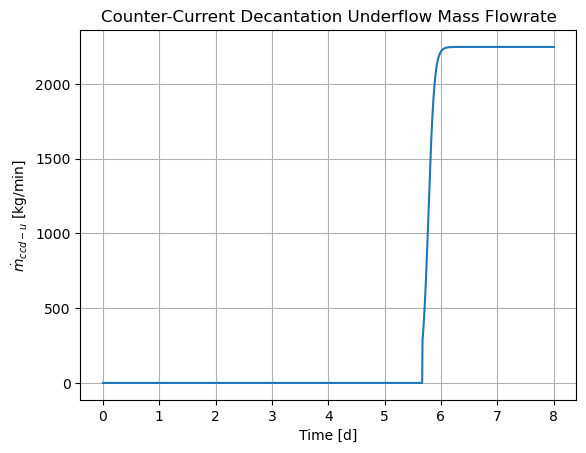

In [11]:
import matplotlib.pyplot as plt
decant_filt = white_mesa_net.modules[0]
(quant, time_unit) = decant_filt.ccd_underflow_phase.get_quantity_history('mass-flowrate')
quant.plot(x_scaling=1/unit.day, y_scaling=unit.minute, x_label='Time [d]', y_label=quant.latex_name + ' [kg/min]')
plt.grid()

The mass flowrate of the counter current decantation underflow shows that it produces 2300 kg/min of waste as tailings once it reaches steady state. The timescale of filling the tank and reaching steady state are the same as overflow as expected by the mass balance. These graphs can be generated for single tank decantation and filtration using a virtual environment generated by the online github repository link at the top of the report.

### [Solvent Extraction](#toc)<a id="solvent"></a>

```python   
                                      |
                                      |  Extraction Feed (from Decantation-Filtration filtrate)
                                      |
                                      v
                              |----------------|
                              |                |
         Organic Feed ------->|                |------> Organic Product (to Scrubbing internal)
         (internal source)    |    Solvent     |
                              |   Extraction   |
         Raffinate <----------|                |<------ Scrub Raffinate (from Scrubbing internal)
         Stream (to CCD Bank) |                |
                              |----------------|
          Organic Product <---|                |<------ Organic Feed (Organic Product from Solv. Extr. internal)
          (to Strip internal) |                |
                              |   Scrubbing    |
           Scrub Feed ------->|                |-------> Scrub Raffinate (to Solvent Extraction internal)
           (internal source)  |                |
                              |----------------|
          Organic Feed ------>|                |-------> Organic Regeneration (to Solvent Extraction not done)
        (from Scrub internal) |   Stripping    |
                              |                |<------ Stripping Feed (internal source)
                              |________________|<------ Stripping Feed (from Precipitation not implemented)
                                      |
                                      |
                                      |
                                      v
                               Stripping Product (Precipitation feed)
```

Solvent extraction, also called liquid-liquid equilibrium or liquid-liquid extraction, is a method used to separate a compound from two immiscible liquids. These two liquids are typically denotes as an aqueous phase and an organic phase. Extraction is performed based on the relative solubility of the solute in the two phases with the driving force being chemical potential as the resulting products are more stable than the initial solution. This process is commonly performed in separatory funnels or in countercurrent mixer settler units.

The solvent extraction of uranium uses the filtered pregnant liquor as the aqueous phase with the solute being uranium. The solvent in this case is an amine salt which is added as a part of the organic phase. The organic phase consists of the solvent diluted in kerosene that has been modified with an alcohol. The amine salt binds to the uranium compound which is more soluble in the organic phase thus removing it from the aqueous phase. Research shows that the best extractants for uranium are either Adogen 363 or Alamine 336, both of which are tertiary amines. These two compounds are excellent at extracting uranium while leaving behind most other impurities such as iron and other metals. In White Mesa, the organic phase consists of Alamine 336 diluted with kerosene modified with isodecanol. Alamine 336 is made almost entirely of Trioctylamine or TOA for short.
<br></br>
<center>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub><sup>4-</sup> + 2(R<sub>3</sub>NH<sup>+</sup>)<sub>2</sub>SO<sub>4</sub> → (R<sub>3</sub>NH<sup>+</sup>)<sub>4</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub> + 2SO<sub>4</sub><sup>2-</sup></center>

From this equation the UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub><sup>4-</sup> is the feed stream from the filtration module. The product of solvent extraction is (R<sub>3</sub>NH<sup>+</sup>)<sub>4</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub> with the other product exiting as a waste stream. One problem with this technique is the extraction of molybdenum is preferred to uranium and must be removed. This solution can be introduced to a stripping column to increase the purity of the solution through the removal of molybdenum. The selective stripping of uranium from the solution can be seen with the chemical reaction below.
<br></br>
<center>(R<sub>3</sub>NH<sup>+</sup>)<sub>4</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>3</sub> + 4NH<sub>4</sub>OH ⇌ 4R<sub>3</sub>N + 4H<sub>2</sub>O + (NH<sub>4</sub>)<sub>2</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>2</sub> + (NH<sub>4</sub>)<sub>2</sub>SO</center>

Solvent extraction occurs in mixer-settler vessels where the organic and aqueous phases are agitated in a mixer then deposited into a settling tank to phase split. The aqueous phase will sink to the bottom with the organic phase rising to the top. The organic phase is then sent to the previous stage with the aqueous phase being passed to the next stage. This results in the first mixer-settler vessel delivering the product to the stripping circuit with the final mixer-settler vessel delivering a waste stream to the tailings area.

After solvent extraction the stripping circuit begins with an acidic water wash. Immediately afterwards the organic phase is deposited into another bank of mixer-settler vessels where an acidic sodium chloride solution is used to extract uranyl ions. The stripping circuit will remove nearly all of the uranium from the organic phase resulting in a product of (NH<sub>4</sub>)<sub>2</sub>UO<sub>2</sub>(SO<sub>4</sub>)<sub>2</sub> which is ready to be fed into the precipitation stage where the sulfate will be removed from the compound to be precipitated into U<sub>3</sub>O<sub>8</sub>.

### [Precipitation](#toc)<a id="precip"></a>

Precipitation is a key step in uranium mining, it comes after the leaching and pumping processes. Once the ore has been injected with the acid solution, it is then recovered into the surface and precipitated from the solution. This precipitate is then filtered to remove the acid and dried up into a solid. The concentrated, purified uranium solution (referred to as “pregnant solution” or “eluate”) is advanced to a precipitation stage using hydrogen peroxide, magnesium oxide, or sodium hydroxide.  This process is one of the final in purifying the uranium and separating it from the ore and other unwanted materials present in the ore. This process is repeated as many times as economically possible to strip as much uranium from the ore as possible. The end result of this process is oxidized uranium, also known as yellow cake, a solidified version of U308. Higher levels of carbonate in the orebodies will require more sulfuric acid, making precipitation more costly. Because this process uses water, after milling is done water needs to be returned to its original purity in order to be returned to its environment and prevent any accidents or contamination. Some of the water can be re used for the process.



### [Evaporation/Calcining](#toc)<a id="evap"></a>

```python
                                              |
                                              |  Ammonium Diuranate Feed
                                              v
                                       ________________       
                                      |                |
                                      |                |
                                      |                |<------ Steam Sparging
                                      |  Evaporation   |
                                      |                |
                   Off-Gas <----------|                |<------ Resistance Heating (Internal)
                                      |                |
                                      |----------------|
                      Off-Gas <-------|                |<------ Sweeping Gas
                                      |                |
                                      |   Calcination  |
                 Sweeping Gas <-------|                |
                   (Disposal)         |                |
                                      |________________|<------ Resistance Heating (Internal)
                                               |
                                               |
                                               |
                                               v
                                        Product (U3O8)
```

__Uranium Drying Overview__

The process of drying the incoming slurry produced by precipitaiton now has to undergo a drying process at extremly high temperatures.The product being fed into the drying section of the milling process mainly contains ammonium diuranate, which is dried to produce the coveted triuranium octoxide. The main stages of this process are the evaporation stage and the calcining stage.
<br>

The conditions used for drying and calcining ammonium diuranate and uranium peroxide are listed below:
<br>
<br>
<p style="text-align:center;"><b>Table 2: Parameter for Calcining and Drying of Precipitation Products.</b></p>
<img width="400" src="pics/.png" title="Calcining/Drying Table">
<br> 
The reaction that is happening in the drying process is typically summerized as one whole reaction since it only accounts for the addition of heat throughout the process. This heat will cause the ammonia compound to seperate from the ammonium diuranate, along with other light impurites and yield the desired product of triuranium octoxide. The reaction of this heating process is as follows:

*Production of Triuranium Octoxide*

</br>
<center>9(NH<sub>4</sub>)<sub>2</sub>U<sub>2</sub>0<sub>7</sub> → 14NH<sub>3</sub> + 15H<sub>2</sub>O + 2N<sub>2</sub> + 6U<sub>3</sub>O<sub>8</sub></center>

__Evaporation Process__

Evaporation is a process in which an element or compound transitions from its liquid state to its gaseous state below the temperature at which it boils. However, the form of drying we will be dealing with in this stage of the process is working with a reactant that has become mostly solid thanks to the precipitation process. Thus, evaporation will mainly target the water vapor that remains attatched to the ammonium diuranate slurry.

The unit operation that is going to be used for this process is known as a falling film evaporator tank. This type of evaporator is a specific type of vertically oriented shell and tube heat exchanger that is used to separate two or more substances with different boiling point temperatures. It acts as most evaporator columns do in the fact that it heavily relies on a desired product stream that is heavy enough to sink to the bottom while the inpurities rise to the top.

However, in falling film evaporators the process liquid is pumped into the top of the column, and is distributed evenly across all of the heating tubes in the heat exchanger. It is very important that the liquid be well distributed so that it evenly flows down the inside walls of each tube. This film of liquid that is descending through the tubes is known as a “falling film” and is where this particular heat exchanger derives its name.

The process can be summerized as filling the evaporator column to its peak volume, adding heat to evaporate it, and then discharging it to the next stage of the process. The overall process of the falling film evaporator is shown below:
<br>
<br>
<img width="400" src="falling-film.jpg" title="Falling Film Evaporator Process">
<p style="text-align:center;"><b>Figure 4: Falling Film Evaporator Process.</b></p>

Each evaporator column will be run at a temperature of 350°C. There while be two product streams exiting this column, one being the vapor extracted from the slurry. This is known as the off-gas produced by this evaporation, and it will be sent to be further processed in a seperate Vapor/Liquid seperation column. The second stream is the product containing the ammonium diuranate that now has a lot less vapor content in it. This product will now be fed to the calcination stage of the drying process to be further processed.


__Calcination Process__

The second stage of the drying process is known as calcination. In terms of the overall process it will follow a similar basis to that of evaporation, but at a higher temperature. However, there are some distinguishable differences in calcination since the feed is now mostly a pure solid. Calcination involves the heating of solids to a high temperature for the purpose of removing volatile substances, oxidizing a portion of mass, or rendering them friable. Therefore, this stage in the drying process is sometimes considered a process of absolute purification.

An example of an overall calcining of incoming ammonium diuranate is shown in the diagram based out of Key Lake below [4]:
<br>
<br>
<img width="400" src="pics/.png" title="Calciner Tank">
<p style="text-align:center;"><b>Figure 5: Calciner Tank Process at Key Lime Uranium Mill.</b></p>
<br>
This production happens in large molar quantities, and assuming a 100% conversion rate every 100 kgs of ammonium diuranate will result in 90 kgs of triuranium octoxide. High temperature calcining is practiced producing a greater than 94% U<sub>3</sub>O<sub>8</sub> product having high density [3].

Calcination eliminates water completely, and drives off the ammonia, but care must be taken not to sinter the product.

Sintering can significantly reduce nitric acid solubility, which is critical for some refining processes. Several types of drying equipment have been used in the calcining process, typically arranged in the series of dryers that succeed the main calciner tank. These include single or multiple hearth dryers, drum dryers, belt dryers, screw dryers and radiant heat dryers. There also becomes the problem of how to dispose of the ammonia used as a "sweep-gas" to drive the heat transfer in the calciner. As seen in figure 4, the solution to the produced ammonia is to add a form of fluid bed dryer to the calciner tank to extract the ammonia vapor.

__Sizing and Cost__

The size of each of the main columns used in this process will prove to be vital to the overall drying module. For evaporation, it was determined that there would be 2 columns used in this process. Each of these columns would be sized at 200m<sup>3</sup>. For calcination, it was determined that 2 MHF units would be utilized. Each of these calciner unites would have an overall volume of 350m<sup>3</sup>.

The overall cost of this operation will be strictly based on the main unit operations involved in the process. Thus, it will mainly pertain to the evapotator and calciner columns. For the evaporator tank, it will utilize a stainless steel material to withstand the high temperatures the system is going to be exposed to. Using (x), it is assumed that the cost of each of the 200m<sup>3</sup> falling film evaporator columns using this material will be 28,700 dollars. For the calciner, it will also utilize stainless steel, but will also include an interior refactory brick layer since it will have a low thermal conductivity during the heat reaction. This in turn will not only lead to protection of the stainless steel outer layer, but will also yield greater energy efficiency for the overall heating process. Using (x), each of the MHF calciner units, with a capacity of 350m<sup>3</sup>, will cost 75,370 dollars. 

In total, the overall drying process will cost approximately 208,140 dollars to construct and design.

__Modeling the Module__

To model this process, the process needs to remain seperated by the two main stages of drying. Thus, two seperate subsections to this module will be created for both evaporation and calcination.

Starting with evaporation, this basis of the model needed some input parameters to work with. The feed mass flowrate was determined to be 5800 kg/min, along with a  set overall volume of 400m<sup>3</sup> (remember there are two tanks). The third and final parameter that will be monitored is the product mass density, which is being feed in at 

a paramter had to be selected to base the model after that would be able to monitor the amount of flow entering and exiting the tank. This was chosen to be the liquid volume of the evaporator tank, but it came with some conflicts. Being able to differentiate whether the tank was filling, evaporating, or discharging into the next stage was difficult to determine using only this parameter. 


## [Disturbance](#toc)<a id="malfunction"></a>

The modules are set up to allow a change in the inputs of tank size, mass flowrate, and the composition of each phase. If the values are changed, the resulting code should automatically carry the changes through in each time step, creating a new path of correction towards steady state. For example, an increase of the single tank thickener in the decantation/filtration section of the code would result in a more sluggish response with a longer time to reach steady state operation. Likewise, if the steady state values change based on the desired production quality, the model can adjust to these new steady state values once they are altered in the dynamic equations within the code.

## [References](#toc)<a id="refs"></a>



- [1] V. F. de Almeida, [Cortix](https://cortix.org), *Network Dynamics Simulation*, University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear program).
- [2] V. F. de Almeida, [*Engy-4350: Nuclear Reactor Engineering*](https://github.com/dpploy/engy-4350), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Program).
- [3] “35 No. 9 Uranium Extraction Technology - IAEA.” Uranium Extraction Technology, IAEA, 1993, www.pub.iaea.org/MTCD/Publications/PDF/trs359_web.pdf. 
- [4] “NRC: Conventional Uranium Mills.” Www.nrc.gov, www.nrc.gov/materials/uranium-recovery/extraction-methods/conventional-mills.html.
- [5] “STATE OF UTAH RADIOACTIVE MATERIALS LICENSE No. UT1900479 .” White Mesa Uranium Mill - License Renewal, Denison Mines Corp., 2007, www.documents.deq.utah.gov/legacy/businesses/e/energy-fuels-resources-usa/docs/2014/index.html. 
- [6] “Half Bridge Sludge Scraper Thickener Tank Price Water Clarifier for Engineering Wastewater Treatment Solid Liquid Separator.” Half Bridge Sludge Scraper Thickener Tank Price Water Clarifier For Engineering Wastewater Treatment Solid Liquid Separator - Buy Water Clarifier Water Machine,Sludge Scraper Peripheral Scraper,Industrial Water Clarifier Product on Alibaba.Com, 2022, www.alibaba.com/product-detail/Half-Bridge-Sludge-Scraper-Thickener-Tank_62386077679.html. 

CamecoCorporation. (2021, December 7). How It's Made - Uranium Part 2 [Video]. YouTube. https://www.youtube.com/watch?si=MOfC9CL7AqTSexF7&v=c7ehyxRBMbw&feature=youtu.be

In-situ Leach mining of uranium. (2024, May 16). World Nuclear Association. https://world-nuclear.org/information-library/nuclear-fuel-cycle/mining-of-uranium/in-situ-leach-mining-of-uranium#:~:text=The%20water%20is%20re%2Doxidized,uranium%20as%20is%20economically%20feasible

Uranium mining overview. (2024, May 16). World Nuclear Association. https://world-nuclear.org/information-library/nuclear-fuel-cycle/mining-of-uranium/uranium-mining-overview

Uranium mining, processing, and reclamation - Uranium mining in Virginia: Scientific, technical, environmental, human health and safety, and regulatory aspects of uranium mining and processing in Virginia - NCBI bookshelf. (2011, December 19). National Center for Biotechnology Information. https://www.ncbi.nlm.nih.gov/books/NBK201050/#:~:text=The%20tailings%20are%20then%20forwarded,shipped%20to%20other%20licensed%20facilities
